<a href="https://colab.research.google.com/github/SergioRomanJr/Data_Science/blob/main/Sergio_Roman_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb # Weights & Biases (WandB)
!apt-get install poppler-utils # python package that allows training in real-time as stated by company
!pip install pdf2image # easily integrated with popular deep learning frameworks like Pytorch
!pip install flashtorch # pytorch is used for neural networks as example seen in lab 8/9
import requests
from pdf2image import convert_from_path # this ocde allows for the use of images from slideshpw
import matplotlib.pyplot as plt # as used throughout our course it allow sthe use of methmatics
import numpy as np # precreated prgrams made for python 
import torch # contains data structures for multi-dimensional tensors and defines mathematical operations 
import requests # uses hhtp so it will be useful for incorporating slide shareable link
from torchvision import * # torchvision is another program that will allow us to use tensors
from torchvision.models import *# as stated by program developers it does common image tranformations for computers 
from flashtorch.utils import apply_transforms # these tranformations are what will allow the computer to differentiate images
import wandb as wb # wandb is what we use to run these multiple tests

In [14]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
# these codes appear to de very similar but it what will differentiate the images 
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
# a specialized processor originally designed to accelerate graphics rendering as stated by intel
# GPUs can process many pieces of data simultaneously, making them useful for machine learning, video editing, and gaming applications (intel)
# meaning def GPU data will use the information from the computer gpu system
def plot(x):
    fig, ax = plt.subplots() # here we are using code learned since lab 1 to create a plot
    im = ax.imshow(x, cmap = 'gray') # this is going to use grays to differentiate 
    ax.axis('off') # the axis of the graph is off
    fig.set_size_inches(5, 5) # we are now defining the size of figure
    plt.show() # show processes the data if we wanted to see it we would code for pl
    
def get_google_slide(url): # this piece of code will allow us to pull the images from our google slideshow
    url_head = "https://docs.google.com/presentation/d/" # this is the format in which the link must appear
    url_body = url.split('/')[5] # a url split condenses the url
    page_id = url.split('.')[-1] # since the google slideshow is itself a bunch of pages this code is necessary
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id
# this makes sure it returns all the information on every google slideshow page by exporting them as a pdf instead of original format
def get_slides(url): # we are defining the google slideshow images since we cant just directly import them as google slides
    url = get_google_slide(url) # we need just the url for our infomation to pass so we dont add every image independantly
    r = requests.get(url, allow_redirects=True) # this allows redirects so that the permision is given
    open('file.pdf', 'wb').write(r.content) # this is why it is importnant that anyone with link has acess so colab can redirect the images
    images = convert_from_path('file.pdf', 500) # this converts the image into a basic strcutre across the entire notebook
    return images # we dont want them to cover the entire page so we make them standardized pdf
# return image prints out all of the google lside images into the page
def load(image):
#  load image is being defifned so that they can be put into the notebook
    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)
# they are defined this way so that the images go through parameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
# as stated by compciv.org keys are used to assing values complicated data
model = alexnet(weights='DEFAULT').to(device)
# as stated by pytorch alexnet is  open source machine learning framework 
# it accelerates the path from research prototyping to production deployment in the professional world
model.eval();
# evaluates the model of our previous code

In [12]:
url = "https://docs.google.com/presentation/d/1AavFxaAEsC4VCh9ffeQREosij0-UC5PU9DTozUvpnsM/edit#slide=id.g1ad98a9da66_0_195"

In [ ]:
# here is the accesable code from by presentation copied directly from the url

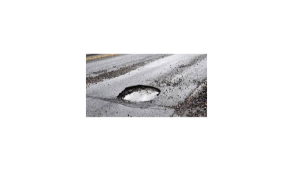

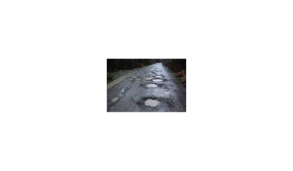

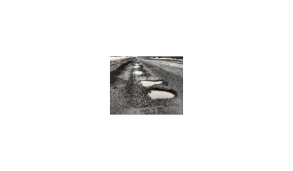

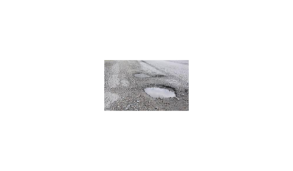

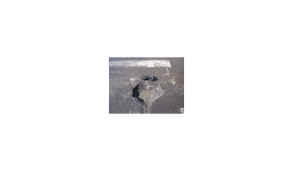

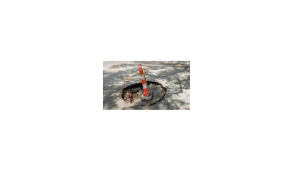

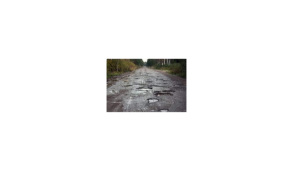

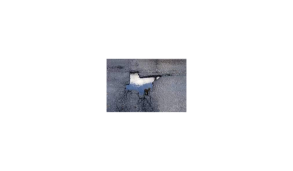

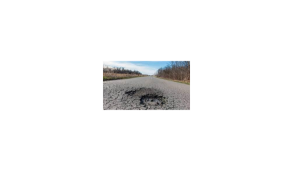

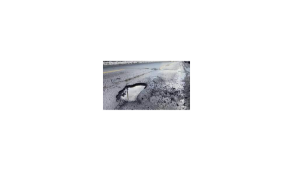

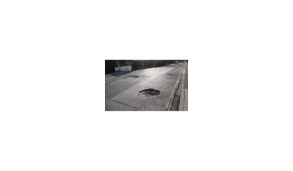

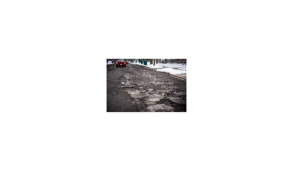

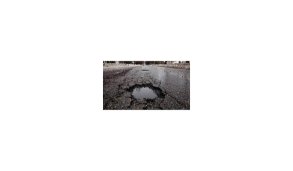

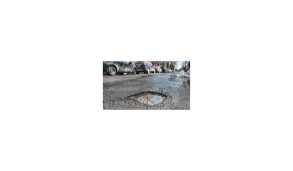

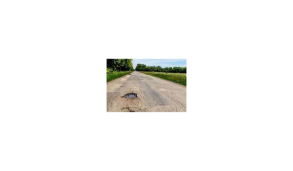

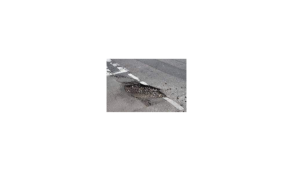

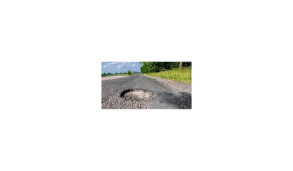

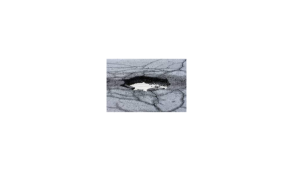

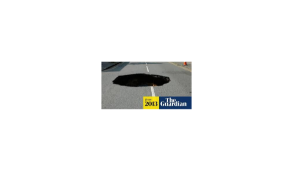

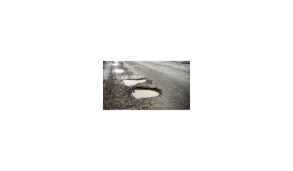

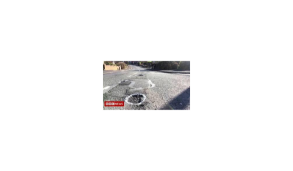

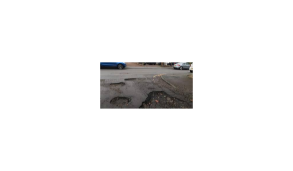

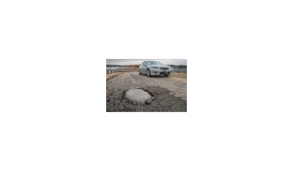

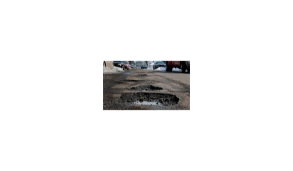

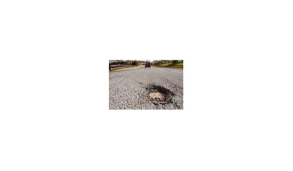

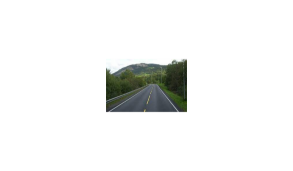

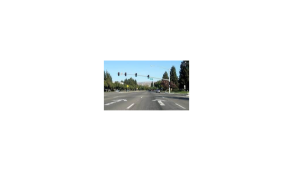

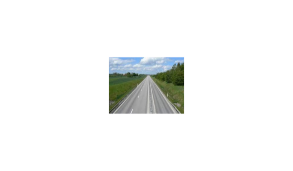

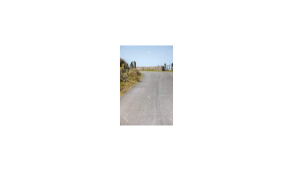

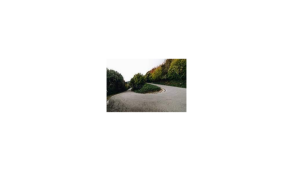

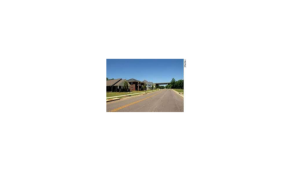

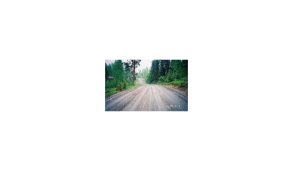

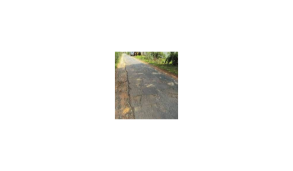

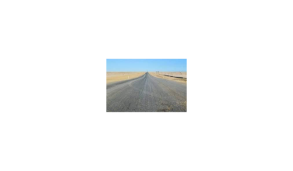

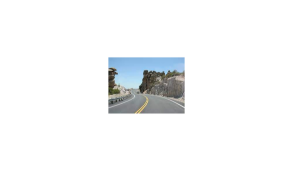

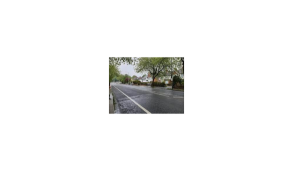

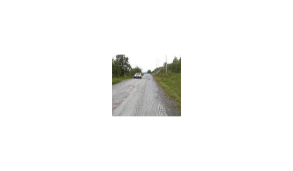

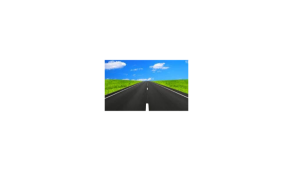

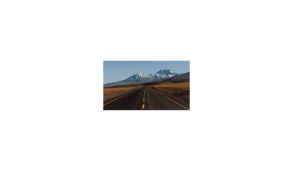

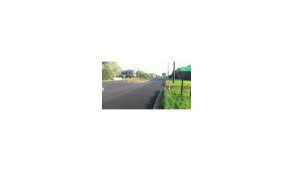

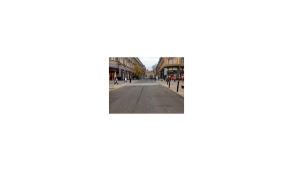

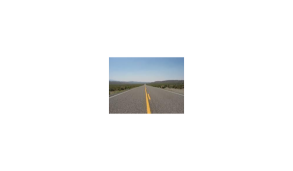

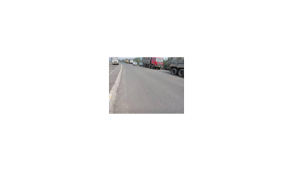

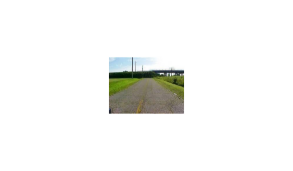

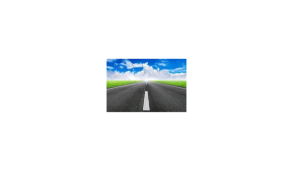

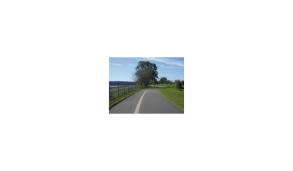

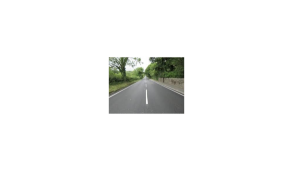

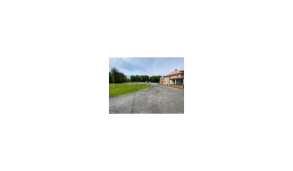

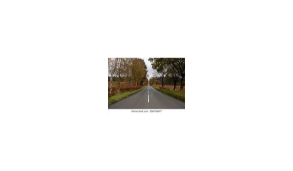

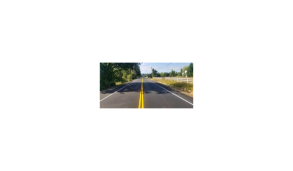

In [15]:
images = []
# this is for inserting the images into the notebook
for image in get_slides(url):
# images in get slides means it is pulling the images from every slide on presentation
    plot(image)
# plits the image as a sort of graph rather thana actaul image
    images.append(load(image))
# this is now the code for loading the image 
images = torch.vstack(images)
# v.stack allows the image to appear as shown

In [ ]:
# all 50 recollected images from the presentation

In [16]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
# this is the size of the images, each describes a vector of the image

In [17]:
model(images)

tensor([[-0.1640, -3.7992, -0.6083,  ..., -3.5540,  0.4519,  2.1857],
        [-0.9148, -2.4730, -2.0076,  ..., -3.2791,  1.0947,  2.4165],
        [-1.4612, -2.4663, -3.4056,  ..., -4.3836,  0.5813,  1.5203],
        ...,
        [ 0.5951, -2.5169, -3.7413,  ..., -2.6578,  1.4666,  2.4688],
        [-1.0862, -2.5638, -4.3942,  ..., -2.3829,  1.0042,  2.1481],
        [-0.1292, -1.1973, -3.9024,  ..., -3.5107,  2.3009,  1.8763]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
# this piece of coding is to classify each image in respective category

In [18]:
y = model(images)

In [ ]:
# since we are originally coding for a graph which will be source of information for test runs y is important to define

In [19]:
y.shape

torch.Size([50, 1000])

In [20]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
# we are guessing using torch progams tensors to give us data for differenating the images

In [ ]:
# the more times it is done the more accurate it should get
# that is why we are running three thests to see how the system performs
# since it is looking at specific pixels rather than an entire image and analyzing it as a whole

In [21]:
for i in list(guesses):
    print(labels[i])

iron, smoothing iron
web site, website, internet site, site
buckle
envelope
mousetrap
tractor
web site, website, internet site, site
envelope
envelope
mousetrap
cleaver, meat cleaver, chopper
web site, website, internet site, site
wallet, billfold, notecase, pocketbook
wallet, billfold, notecase, pocketbook
web site, website, internet site, site
mousetrap
web site, website, internet site, site
mousetrap
modem
switch, electric switch, electrical switch
cassette
modem
web site, website, internet site, site
cassette
rule, ruler
mountain tent
web site, website, internet site, site
umbrella
beacon, lighthouse, beacon light, pharos
web site, website, internet site, site
web site, website, internet site, site
web site, website, internet site, site
envelope
envelope
web site, website, internet site, site
hair slide
envelope
web site, website, internet site, site
web site, website, internet site, site
web site, website, internet site, site
envelope
envelope
envelope
web site, website, internet 

In [ ]:
# in the end the computer is making guesses on the images provided 
# this is where y previously defined y comes intlo use

In [22]:
Y = np.zeros(50,)
Y[25:] = 1

In [23]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
X = y.detach().cpu().numpy() 

In [ ]:
# from my understanding this code is asiking the computer to retreive values or data from a specific tensor
# using detach is indicating to the prgoram not all parts of image will most likely be used and gives instructions to the cpu

In [25]:
X.shape

(50, 1000)

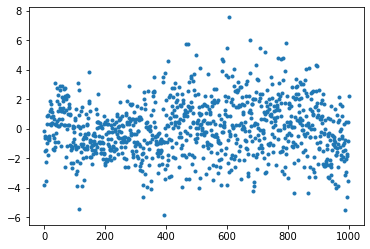

In [26]:
plt.plot(X[0],'.')

In [ ]:
# we are creating a plot within this code but not plotting it to appear in notebook

In [ ]:
# we did the same thing for the kanji characters in the lab 8 and 9

In [27]:
X[0]

array([-1.64039642e-01, -3.79918385e+00, -6.08260930e-01, -1.53064537e+00,
       -5.22461057e-01, -1.46118832e+00, -2.26289392e+00, -3.55161428e+00,
       -9.77396250e-01,  3.07085097e-01,  8.90526235e-01, -5.39795220e-01,
       -6.71194613e-01,  9.46519971e-01, -1.75627136e+00, -6.46164119e-01,
       -5.17498136e-01, -7.78248489e-01,  1.19519877e+00,  1.86265779e+00,
        3.19677830e-01,  1.32506061e+00,  8.25126171e-01,  2.29634583e-01,
        1.65502477e+00,  1.15915930e+00,  3.89945984e-01,  3.61850023e-01,
        8.62474799e-01, -4.07320172e-01, -1.40627754e+00,  6.37060225e-01,
       -6.34094894e-01, -1.45411730e+00,  3.07897377e+00, -9.12907720e-01,
        3.46397161e-01, -1.25861847e+00,  2.26804450e-01,  3.45334172e-01,
       -2.97128052e-01,  2.76138306e+00,  5.19922853e-01,  1.86674559e+00,
        2.31139231e+00, -8.78771067e-01,  1.19817853e+00,  1.86342433e-01,
        1.61635041e-01,  6.40146971e-01,  1.66527402e+00,  1.40200448e+00,
        2.90269661e+00,  

In [28]:
np.argmax(X[0])

606

In [ ]:
# gives us an array of the values we used in our graph and allows for fast mathematical operation

In [29]:
labels[948]

'Granny Smith'

In [30]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
# we are defining top ten

In [31]:
for i in top_ten:
    print(labels[i])

iron, smoothing iron
nail
ski
buckle
can opener, tin opener
hook, claw
pencil sharpener
plane, carpenter's plane, woodworking plane
cleaver, meat cleaver, chopper
screw


In [ ]:
# as stated by numpy.org argsort is performing an indirect sort along the given axis using the algorithm specified by the kind keyword
# in this case the keyword is top ten
# using print labels allows us to see the data itself 

In [32]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  5.,  37., 115., 259., 274., 189.,  89.,  23.,   8.,   1.]),
 array([-5.8410044, -4.5015497, -3.1620948, -1.82264  , -0.4831852,
         0.8562696,  2.1957245,  3.5351791,  4.874634 ,  6.214089 ,
         7.5535436], dtype=float32),
 <a list of 10 Patch objects>)

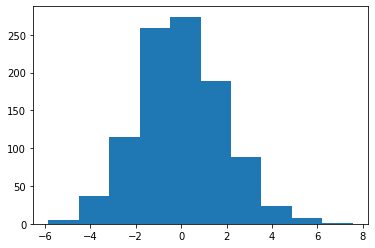

In [33]:
plt.hist(X[0])

In [ ]:
# here we are plotting all of our information on a histogram.

In [34]:
X = GPU_data(X)
Y = GPU_data(Y)

In [35]:
def softmax(x): # we are defining softmax
    s1 = torch.exp(x - torch.max(x,1)[0][:,None]) # as stated by pytorch Softmax function to an n-dimensional input
    s = s1 / s1.sum(1)[:,None] # Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1]
    return s # returns the information from the tensor 

In [36]:
def cross_entropy(outputs, labels): # as stated by pytorch.org this code computes the cross entropy loss between input logits and target         
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  # training a classification problem with C classes.

In [37]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 # statistical parts or a formula
    sigma = 0.1 # sigma is usaully for the change in, useful for values
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s) # returns the information from the formaulla

In [38]:
def Truncated_Normal(size):
# resizes the information from the tensor 
    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2) # this will allow it to be read by wieghts and biases 
    u2 = torch.rand(size) # also modifyies the values 
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z # returns the new values from the tensors with -2

In [39]:
def acc(out,y): # this part of code is for disabling gradient calculation
    with torch.no_grad(): # is useful for inference
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] # speeds up computations 

In [40]:
X.shape

torch.Size([50, 1000])

In [ ]:
# size of the the final torch tensor

In [41]:
def get_batch(mode): # get batch is useful for compling various values
    b = c.b
    if mode == "train": # train is for each set of information
        r = np.random.randint(X.shape[0]-b) # in the case of labs is was computing numbers for different sets
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test": # it is going to test the tensors
        r = np.random.randint(X_test.shape[0]-b) # elif is useful for conditionals in python coding 
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y # returns the various tests performed using all the batch values

In [42]:
def model(x,w):
# w is a defined tensor
    return x@w[0] # it is returned and the data is used

In [43]:
def make_plots():
    # this is defining certain parameters for the plots using the before compiled information 
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train}) # the acc train test the accuracy of the train test batch
    # when test is run accuracy will no appear as a value 

In [46]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config # this value when test is run will automatically create this folder in the weights and biases program
# from there we can see all of our information regarding our runs

c.h = 0.001
c.b = 32
c.epochs = 100000
# as stated my machinelearing.org epochs is a hyperparameter 
# it defines the number times that the learning algorithm will work through the entire training dataset
w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  
# an opitmizer goes through data and makes it easier for the computer to run
for i in range(c.epochs):
# range of epochs will be how much information goes throogh the graph
    x,y = get_batch('train')
# get batch is getting all of the numbers from our simulatilns
    loss = cross_entropy(softmax(model(x,w)),y)
# loss can be described as the part that was not accurate during the experiment
# since it decreases everytime the run gets more and more accurate
# it is values that were unused
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   # loss will allow for the program to not go through as much information
    wb.log({"loss": loss})

    make_plots()


acc_train,▂▆▆▆▆▅▅▆▄▁▆▅▃▆▁▂▄▅▃▂▆▅▅▄▆▄▆▂▆▆▅▆▄▂▁█████
loss,▇▃▃▃▃▄▅▃▅█▃▅▆▃█▇▅▅▆▇▃▅▄▅▃▅▃▇▃▃▅▃▅▇█▁▁▁▁▁
acc_train,0.9375
loss,0.37576


<ipython-input-14-ec4412b9edf6>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
# Total for experiment
# run 1 silvery 0.51, 0.78
# run 2 cosmos  0.81, 0.49
# run 3 resonance 0.96, 0.34
# average of runs
# 0.76 and 0.53

https://tensorspace.org/